## Euler's Method: Obtaining Solutions to ODE's Numerically

#### Author: Jaime Sabal
#### Date: 03/07/2020

In this notebook we explore the extent to which Euler's Method can be used to accurately obtain the solution to an ordinary differential equation. Euler's method follows from the definition of a derivative by the Fundamental Theorem of Calculus:

$$
\frac{dx}{dt} = \lim_{dt\to0} \frac{x(t+dt)-x(t)}{dt}
$$

Moreover, using the approximation that

$$ \frac{dx}{dt} \approx \frac{x(t+dt)-x(t)}{dt} $$

and subsituting in a simple 1st-order ordinary differential equation (ODE):

$$ \frac{dx}{dt} = -Ax $$

we can rearrange to solve for $x(t+dt)$ as a function of $x(t)$:

$$ x(t+h) = x(t) -Axh, $$

We can thus iteratively solve this ODE, where $h=dt$ is the step taken between each iteration, given some initial condition $x(t_0) = x_0$. More especifically, the update performed on the function upon each increase in the independent variable: $t \rightarrow t+h$, will have the form

$$ x[i+1] = x[i] - A*x[i]*h $$

### Importing Necessary Libraries

We start off by importing the necessary libraries: `numpy`, `matplotlib`, `time`, and `math`, which will facilitate the calculations and visualisations done.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import time

### Defining Necessary Constants that will be Used Throughout Notebook:

In [4]:
#Limits in array of independent variable (t):
t_max = 5 #upper t limit 
t_min = 0 #lower t limit

A = 1 #constant in ODE
x0 = 1 #initial condition

### Defining a Python function that calculates the solution to any first-order ODE:

In [5]:
#defining function to perform Euler's Method of solving first-order ODE's numerically
def eulers_method(t_min, t_max, h,x0):
    """ Calculates the solution to any first-order ODE for which the derivative of
    a function only depends on the function itself. It requires some initial condition 
    that x(t0)=x0, where t0 is the entry at index 0 of the array of values t. 
    
    Parameters:
    · f (function): derivative of function that will be calculated.
    · t_min (float/int): smallest value in function domain.
    · t_max (float/int): largest value in function domain.
    · h (float): step size in iteration.
    · x0 (float): initial condition; value of wanted function at time t0 
    (index 0 of array t).
    
    Outputs:
    · t_array (1D NumPy array): array of values for the independent variable of the ODE.
    · x (1D NumPy array): the computed approximation to the solution of the ODE 
    from Euler's Method.
    · time (float): time taken to compute solution, in seconds.
    """
    
    x = [x0] #initialise array of values for our solution
    
    #setting array of values for independent variable   
    t_array = np.arange(t_min,t_max+h,h)
    
    start = time.time() #start computation timer 
    
    #calculate solution iteratively
    for i in range(len(t_array)-1):
        x.append(x[i]+ODE(x[i])*h)
    
    end = time.time() #end computation timer
    
    #return array of steps used in iteration
    # as well as complete array of values for solution 
    duration = end-start
    return t_array,x,duration

### Defining a Python function for the Differential Equation

In [6]:
def ODE(x):
    """Returns the value of the differential equation dx/dt=-A*x(t) for a given x and t.
    
    Parameters:
    · x (float): Value of independent variable x that our derivative is dependent on.
    · t (float): Value of dependent variable t that x is dependent on.
    · global variable A (float/int): constant of proportionality between the derivative
    of a function and the function itself.
    
    Output: 
    · dx (float): Value of derivative dx/dt for the specified x and t
    """
    
    deriv_x = -A*x
    return deriv_x

### Obtaining a Numerical Solution to ODE:

Next, we will use the defined functions `eulers_method` and `ODE` to obtain a numerical solution to the specified ordinary differential equation:

$$ \frac{dx}{dt} = -x $$

where, for simplicity, $A=1$. Moroever, we will use the initial condition that $x(t=0)=1$ and a value for the step size of $h=0.99$*. Furthemore, we will use a range of values $0 \leq t \leq 5$ to appreciate well the difference between the analytic and numerical solutions later on (since they're asymptotic and both tend to 0 for large values of t)

*Note that we must choose a step size small enough that we dont overshoot $x(t)$ to a value outside its known range (this being $x \epsilon  [0,\infty]$). For this reason, the step size we choose must be $0 < h < 1$.

In [7]:
h1 = 0.99 #step size

#calling our function to solve the differential equation
t_num1,x1,duration1 = eulers_method(t_min,t_max,h1,x0)

print("The array of values for the solution to the differential equation across all t:\n"
      , x1)

The array of values for the solution to the differential equation across all t:
 [1, 0.010000000000000009, 9.99999999999994e-05, 9.999999999999972e-07, 9.999999999999904e-09, 9.999999999999924e-11, 9.999999999999965e-13]


### Plotting and Comparing with Analytical Solution:

Since the above ordinary differential equation is separable, we can solve it analytically as such:

$$ \frac{dx}{x} = -t $$

$$ln(x) = -t + C$$

$$x(t) = e^{-t+C} = e^{C}e^{-t}$$

In this case we have defined our initial condition to be $x(t=0)=1$, and hence by plugging this into the equation above we get:

$$ x(t=0) = e^{C}e^{0} = 1$$

$$ \therefore e^{C} = 1 $$

Resulting in the final analytic solution to the ODE:

$$x(t) = e^{-t}$$

We can plot this result using the `matplotlib` library and compare it with the acquired numerical solution:

The time taken to calculate each solution:
Numerical with h=0.99: time=0.00001 seconds
Analytic: time=0.00044 seconds


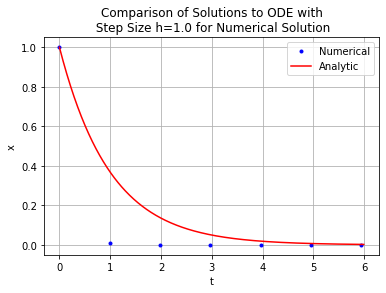

In [8]:
#Analytic solution
start_anal = time.time() #timer start
t_anal = np.linspace(t_min,t_max+h1,500)
x_anal = np.exp(-t_anal)
end_anal = time.time() #timer end

#Time taken to calculate analytic solution
duration_anal = end_anal-start_anal

#Plotting both solutions in a figure
plt.figure()
plt.title("Comparison of Solutions to ODE with\n Step Size h=%0.1f for Numerical Solution"%(h1))
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t_num1,x1,"b.", label="Numerical")
plt.plot(t_anal,x_anal,"r", label="Analytic")
plt.legend(loc="best");

print("The time taken to calculate each solution:")
print("Numerical with h=%0.2f: time=%0.5f"%(h1,(duration1)), "seconds") 
print("Analytic: time=%0.5f seconds"%(duration_anal))

As can be seen, the result shows a solution that has the same trend as the one found analytically, but that approaches its asymptote at $x=0$ at a much quicker rate due to the large step size.

We can further extend our analysis by calculating the maximum and percent error when comparing our found numerical solution with the analytic one.

### Defining Function to Calculate Maximum Error and Percent Error of Numerical Solution

Wer define a function below to calculate the root-mean-squared (rms) error between the analytical and numerical solutions as well as the corresponding percent error between them. We calculate the RMS error through the equation [1]:

$$RMS Error = \sqrt{\frac{\sum_{i=1}^{n} (\hat{y_{i}}-y_{i})}{n}}$$

where $y_{i}$ is the numerical result and $\hat{y_{i}}$ is the analytical result for a total of $n$ data points. The RMS percent error is then [2]:

$$RMS Percent Error = \sqrt{\frac{\sum_{i=1}^{n}(\frac{y_{i}}{\hat{y_{i}}}-1)^{2}}{n}}*100$$

In [9]:
def rms_error(x_num,t_num):
    """Calculates the rms error between two arrays representing the calculated 
    analytic and numerical solutions to the ordinary differential equation dx/dt=-x.
    
    Inputs:
    · x_num (1D NumPy array): array of values for numerical solution.
    · t_num (1D NumPy array): array of values for independent variable of 
    numerical solution.
    
    Output:
    · max_error (float): maximum error of the numerical solution when comparing it
    to the analytic result.
    · percent_error (float): percent maximum error between numerical and analytic
    solutions.
    """
    adj_x_anal = np.exp(-t_num)
    
    errors = abs(np.subtract(adj_x_anal,x_num))
    
    rms_error = np.sqrt(np.mean(errors**2))
    
    rms_percent_error = np.sqrt(np.mean(((x_num/adj_x_anal)-1)**2))*100
    
    return rms_error, rms_percent_error

### Maximum error of Numerical Solution with Step Size $h=0.9$:

In [10]:
rms_error1, percent_error1 = rms_error(x1,t_num1) #calculate value fo rms error and percent error

print("The rms error between the two functions is:\n %0.4f"%(rms_error1))
print("rms percent error:\n %0.2f%%"%(percent_error1))

The rms error between the two functions is:
 0.1478
rms percent error:
 92.16%


#### Step size $h=0.099$:

We can now try to use a smaller step size (by an order of magnitude) of $h=0.09$ to see the effects on the acquired solution:

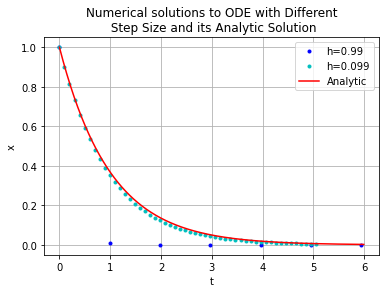

The time taken to calculate each solution:
Numerical with h=0.99: 0.00001 seconds
Numerical with h=0.099: 0.00004 seconds
Analytic: 0.00044 seconds

The rms error for h=0.99 is:
 error = 0.1478 
 Percent error = 92.16%
The rms error for h=0.099 is:
 error = 0.0112 
 Percent error = 14.07%


In [11]:
h2 = 0.099 #new, smaller, step size

#calling our function to solve the differential equation
t_num2,x2,duration2 = eulers_method(t_min,t_max,h2,x0)
rms_error2,percent_error2 = rms_error(x2,t_num2)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solutions to ODE with Different\n Step Size and its Analytic Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t_num1,x1,"b.", label="h=0.99")
plt.plot(t_num2,x2,"c.", label="h=0.099")
plt.plot(t_anal,x_anal,"r", label="Analytic")
plt.legend(loc="best")
plt.show();

print("The time taken to calculate each solution:")
print("Numerical with h=%0.2f: %0.5f"%(h1,(duration1)), "seconds") 
print("Numerical with h=%0.3f: %0.5f"%(h2,(duration2)), "seconds") 
print("Analytic: %0.5f seconds"%(duration_anal))

print("\nThe rms error for h=%0.2f is:\n error = %0.4f \n Percent error = %0.2f%%"%(h1,rms_error1,percent_error1))
print("The rms error for h=%0.3f is:\n error = %0.4f \n Percent error = %0.2f%%"%(h2,rms_error2,percent_error2))

### Discussion:

As can be seen, just reducing the step size by an order of magnitude allows us to acquire a much more accurate solution. However, it is worth mentioning that since the algorithmic complexity of `eulers_method` is $O(n)$, by reducing the step size the program will run slower since it has to perform "$n$" iterations, where $n=len(t)$ is the discrete number of data points, which increases with smaller step size if the range of values of t is kept the same.

Moreover, and as can be seen from the calculations above, the computation time for the numerical solutions using step sizes $h=0.99$ and $h=0.099$ is lower than that of the analytic solution (0.00001s (h=0.99) and 0.00002s (h=0.099) as compared to 0.00024s for the analytic solution**. This is probably due to the fact that the analytic solution has to call the imported library `numpy`). We will discuss this further after performing more trials with smaller step sizes. 

****Computation times may vary for different trials and/or computer processing powers**.

### Solutions using smaller step sizes:

#### $h=0.0099,0.00099,0.000099$:

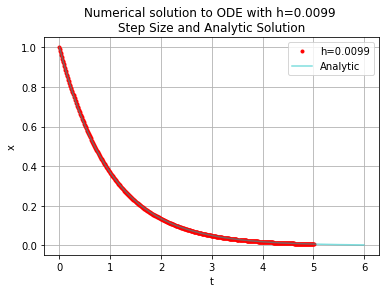

The rms error for step size h=0.0099 is:
 error = 1.106461e-03 
 Percent error = 1.43%

The time taken to calculate it was:
 0.00049 seconds


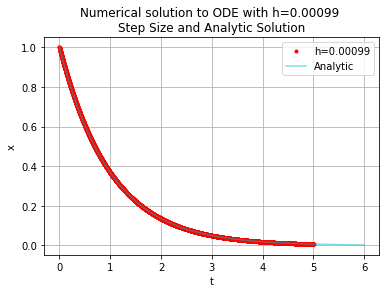

The rms error for step size h=0.00099 is:
 error = 1.105481e-04
 Percent error = 0.143%

The time taken to calculate it was:
 0.003353 seconds


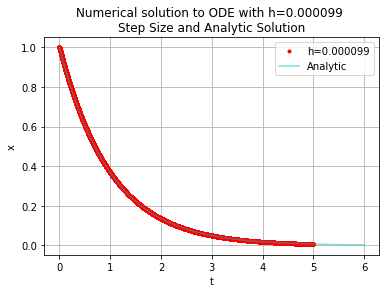

The rms error for step size h=0.000099 is:
 error = 1.105331e-05
 Percent error = 0.0143%

The time taken to calculate it was:
 0.02495 seconds


In [12]:
#three different step sizes
h3 = 0.0099 
h4 = 0.00099
h5 = 0.000099

#calling our function to solve the differential equation with their corresponding timers
t3,x3,duration3 = eulers_method(t_min,t_max,h3,x0)
rms_error3,percent_error3 = rms_error(x3,t3)
t4,x4,duration4 = eulers_method(t_min,t_max,h4,x0)
rms_error4,percent_error4 = rms_error(x4,t4)
t5,x5,duration5 = eulers_method(t_min,t_max,h5,x0)
rms_error5,percent_error5 = rms_error(x5,t5)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solution to ODE with h=%0.4f \nStep Size and Analytic Solution"%h3)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t3,x3,"r.", label="h=%0.4f"%h3)
plt.plot(t_anal,x_anal,"c", label="Analytic", alpha=0.5)
plt.legend(loc="best");
plt.show()

print("The rms error for step size h={0:.4f} is:\n error = {1:e} \n Percent error = {2:.2f}%".format(h3,rms_error3,percent_error3))
print("\nThe time taken to calculate it was:\n %0.5f seconds"%duration3)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solution to ODE with h=%0.5f \nStep Size and Analytic Solution"%h4)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t4,x4,"r.", label="h=%0.5f"%h4)
plt.plot(t_anal,x_anal,"c", label="Analytic", alpha=0.5)
plt.legend(loc="best")
plt.show();

print("The rms error for step size h={0:.5f} is:\n error = {1:e}\n Percent error = {2:.3f}%".format(h4,rms_error4,percent_error4))
print("\nThe time taken to calculate it was:\n %0.6f seconds"%duration4)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solution to ODE with h=%0.6f \nStep Size and Analytic Solution"%h5)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t5,x5,"r.", label="h=%0.6f"%h5)
plt.plot(t_anal,x_anal,"c", label="Analytic", alpha=0.5)
plt.legend(loc="best")
plt.show();

print("The rms error for step size h={0:.6f} is:\n error = {1:e}\n Percent error = {2:.4f}%".format(h5,rms_error5,percent_error5))
print("\nThe time taken to calculate it was:\n %0.5f seconds"%duration5)


### Discussion:

As can be seen from the values displayed above (below each plot), the maximum error and the percent error between the calculated numerical and analytic solutions are both reduced by approximately the same factor of 10 as the step size $h$. 

### Comparison of Time Taken to Calculate Numerical Solutions for 5 Different Steps:

We will now go on and compare the time taken to calculate each of the numerical solutions with different steps $h$. In the cell below we display each of their values.

In [ ]:
print("The time taken to calculate each solution:")
print("Numerical with h=%0.2f: %0.5f"%(h1,(duration1)), "seconds") 
print("Numerical with h=%0.3f: %0.5f"%(h2,(duration2)), "seconds") 
print("Numerical with h=%0.4f: %0.5f"%(h3,(duration3)), "seconds") 
print("Numerical with h=%0.5f: %0.5f"%(h4,(duration4)), "seconds") 
print("Numerical with h=%0.6f: %0.5f"%(h5,(duration5)), "seconds") 

As can be seen, the time values increase significantly as we reduce the step taken between iterations. It is also interesting to compare the factors by which the time values change as the step is reduced. Doing this for the first two steps ($h_1$ and $h_2$)**:

$$ \frac{h_2}{h_1} = 0.1 $$

$$\frac{time_2}{time_1} = \frac{0.00002}{0.00001} = 2 $$

Hence, as the step is reduced by a factor of 10, the time required to compute the solution increases by a factor of approximately 1.4. Repeating this for the rest of solutions (where the ratio between step sizes remains constant at 0.1) yields the results:

$$\frac{time_3}{time_2} = \frac{0.00033}{0.00002} = 16.5  $$


$$\frac{time_4}{time_3} = \frac{0.00167}{0.00033} = 5.06 $$


$$\frac{time_5}{time_4} = \frac{0.01554}{0.00167} = 9.31  $$

From these results, it can be seen how the computation time increases as the step size decreases by a constant factor of 10.

****Note that the values for the times may vary due to differences in the processing power of each computer. However, the above calculations should serve as an approximation of the factor by which these times increase as the step size is reduced.**

### Plotting Computation Time against Step Size

We will now attempt to plot the computation time against the step size in order to durther visualize their relationship. However, there is a limit to the extent in which we can do this. As was discovered before, the amount of time taken to compute the numerical solution of this ODE increases at an increasing rate as the step size is reduced by a factor of 10. For this reason, we will only be able to plot a limitted number of data points in a reasonable amount of computation time. 

In [ ]:
i = 0 #initialise iterative variable
h1 = 0.99 #initialize step size in index 0

#initialize arrays for step size and time
h_array = [h1]
durations = [duration1]

#add data to the above arrays using while loop 
#takes approx. 1min to compute with 8 data points
while i<7:   
    h1 /= 10
    h_array.append(h1)
    durations.append(eulers_method(t_min,t_max,h1,x0)[2])
    i += 1

#make plot
plt.figure()
plt.plot(h_array,durations,"r.")
plt.title("Computation Time Against Step Size when \nusing Euler's Method to Solve ODE's")
plt.xlabel("Step size")
plt.ylabel("Computation Time / s")
plt.grid()

#apply logarithmic scale to h and time axes to visualize better
plt.xscale("log") 
plt.yscale("log") 
plt.savefig("Figure_4.png"); #save figure

The plot above shows how the relationship between computation time and step size is approximately linear in a logarithmic scale. In other words, as the step size is reduced by a factor of 10 each time, the computation time increases by a constant factor that is approximately 10 as well (from the previous result that gave a ratio between computation times of subsequent step sizes of $\sim (8-11)$ for the smaller step sizes). 

It is important to note that the h-axis actually shows the factor by which $h$ is smaller than the axis of the independent variable in question. 

### Plotting the RMS % Error Between Analytic and Numerical Solutions Against Step Size:

We will now plot the RMS % Error between the two solutions for different step sizes as a means to determine a good step size threshold at which the numerical solution is accurate enough.

In [ ]:
#make list of rms % errors
t_array = [eulers_method(t_min,t_max,step,x0)[0] for step in h_array]
x_array = [eulers_method(t_min,t_max,step,x0)[1] for step in h_array]
percent_errors = []

for t,x in zip(t_array,x_array):
    percent_errors.append(rms_error(x,t)[1])
                  
#make plot
plt.figure()
plt.plot(h_array,percent_errors,"r.")
plt.title("RMS % Error Against Step Size")
plt.xlabel("Step size")
plt.ylabel("RMS Percent Error / %")
plt.grid()

#apply logarithmic scale to h and time axes to visualize better
plt.xscale("log") 
plt.yscale("log") 
plt.savefig("Figure_5.png"); #save figure                  

As can be seen in the plot, the RMS percent error between the two solutions increases in a linear manner as the step size increases.

## Conclusion

In this notebook we explored the effectiveness and efficiency of using Euler's method to calculate numerical solutions to the differential equation:

$$ \frac{dx}{dt} = -Ax $$

for different step sizes $h$. An interesting initial finding was that the maximum error between the calculated numerical and analytic solutions to the ODE was proportional to the step size used. For a step size $h=0.9$, the maximum error was found to be $\approx 0.3$, and reducing it by a factor of 10 ($h=0.09$) resulted in a maximum error of $\approx 0.02$. Hence, the latter error is $\sim 10$ times smaller than the previous result (same order of magnitude as the reduction in step size). Moreover, a quantitative analysis of the time needed to compute these solutions showed that the time needed increases exponentially as the step size is reduced in the same manner, as is shown in the figure below:

<img src="files/Figure_4 copy.png" width="400" height="200">

Moreover, calculating the dependence of the RMS percent error between the two solutions on the step size we were able to make the following plot:

<img src="files/Figure_5 copy.png" width="400" height="200">

From this, we see that for a steps size of $\sim 10^{-3}$ the RMS $\%$ error is $\sim 0.1\%$. Given that for a step size $\sim 10^{3}$ times smaller than the scale of the axis in question the error between the two solutions is $\approx0.1\%$, and the fact that at this step size the numerical solution takes only $0.00033$ seconds to compute, this seems like a good threshold for the step size when using Euler's method to approximate solutions to ODE's.

## Evaluation

In this notebook, we have explored Euler's method and its effectiveness when approximating numerical solutions to ODE's. However, there are other known methods to do this that have not yet been considered. One of these is the Runge-Kutta method (RK), which derives from Euler's method. As a matter of fact, Euler's method is nothing but the simplest case of the RK methods (first-order). For this reason, this method allows for a faster convergence to a solution. However, this does not necessarily mean that it will result in a smaller error. In general, other methods to obtain numerical solutions to ODE's should be considered depending on the problem in question, but the analysis done in this notebook shows that Euler's method is a good way of obtaining accurate solutions ($<0.5\%$ error) at a low cost in terms of time efficiency. 


## Bibliography

[1]. S. Holmes, “RMS Error,” Statweb, 28-Nov-2000. [Online]. Available: http://statweb.stanford.edu/~susan/courses/s60/split/node60.html#:~:text=and Regression Index-,RMS Error,with a given x value.&text=Squaring the residuals, averaging the,about the predicted y value. [Accessed: 11-Jul-2020].

[2]. Fomby, T. (2008). SCORING MEASURES FOR PREDICTION PROBLEMS. http://faculty.smu.edu/tfomby/eco5385_eco6380/lecture/Scoring%20Measures%20for%20Prediction%20Problems.pdf

## Appendix:

### Comparing the % Change in Computation Time Between Analytic and Numerical Solutions:

Having plotted the computation times against their corresponding step size, it is now interesting to see how the percent difference between these and the computation time of the analytic solution changes as the step size is reduced. We compute the percent difference between the two solutions using the equation:

$$ \%\Delta = \frac{t_{num}-t_{anal}}{t_{anal}}*100 $$

for each step size $h$.

In [ ]:
#make array of percent difference between time_anal and the computation
#times for each step size
time_diff = [100*((dur-duration_anal)/duration_anal) for dur in durations]

#plot values in a figure
plt.figure()
plt.plot(h_array,time_diff, "b.")
plt.title("Percent difference in Computation Time\n Between Numerical and Analytic solutions for Different Step Sizes")
plt.xlabel("Step size / h")
plt.ylabel("Percent Difference in Computation Time (%)")
plt.grid()

plt.xscale("log") #use log scale for h-axis
plt.yscale("symlog") #use symmetrical log scale for percent differences
plt.savefig("Figure_6.png");

### Discussion

From the plot above, we see how for small step sizes ($h=0.99$ and $h=0.099$), the numerical solution is actually calculated faster than the analytic solution. However, as the step size is further reduced by a constant factor of 10, `eulers_method` takes longer to compute and this difference grows exponentially in favour of the latter. Moreover, we had to use a "symmetrical log" scale for the percent difference axis due to the fact that for the first two values of $h$ the numerical solution was computed faster than the analytic one and thus resulted in negative values for the percent difference (as they were calculated). Hence, this scale had to be used to allow these negative values to be shown in the plot. 